In [1]:
! pip install transformers -q

In [22]:
from transformers import pipeline
import pandas as pd
import seaborn as sns


In [3]:
# tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
# model = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")


In [4]:
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')

Downloading:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

d:\Anaconda\lib\site-packages\huggingface_hub\file_download.py:127: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\david\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [5]:
emotion_labels = emotion("I'm sorry that the order got delayed")


In [6]:
emotion_labels

[{'label': 'remorse', 'score': 0.7496778964996338}]

In [7]:
emotion_labels[0]['label']

'remorse'

In [9]:
large_text = pd.read_csv('../CleanDataset.csv')

In [10]:
large_text.shape

(52176, 7)

In [11]:
large_text.head()

,Toxicity,tweet,tweet_clean,tweet_tokenized,tweet_tok=2,tweet_lemmatized,preprocessed_text
0,0,@user when a father is dysfunctional and is so...,father dysfunctional selfish drags kids dysfun...,"['father', 'dysfunctional', 'selfish', 'drags'...","[('father', 'dysfunctional'), ('dysfunctional'...","['father', 'dysfunctional', 'selfish', 'drag',...",father dysfunctional selfish drag kid dysfunct...
1,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit can not use cause do not ...,"['thanks', 'lyft', 'credit', 'can', 'not', 'us...","[('thanks', 'lyft'), ('lyft', 'credit'), ('cre...","['thank', 'lyft', 'credit', 'can', 'not', 'use...",thank lyft credit can not use cause do not off...
2,0,bihday your majesty,bihday majesty,"['bihday', 'majesty']","[('bihday', 'majesty')]","['bihday', 'majesty']",bihday majesty
3,0,factsguide: society now #motivation,factsguide society motivation,"['factsguide', 'society', 'motivation']","[('factsguide', 'society'), ('society', 'motiv...","['factsguide', 'society', 'motivation']",factsguide society motivation
4,0,[2/2] huge fan fare and big talking before the...,huge fan fare big talking leave chaos pay disp...,"['huge', 'fan', 'fare', 'big', 'talking', 'lea...","[('huge', 'fan'), ('fan', 'fare'), ('fare', 'b...","['huge', 'fan', 'fare', 'big', 'talk', 'leave'...",huge fan fare big talk leave chaos pay dispute...


In [12]:
large_text['preprocessed_text'][1:10].apply(emotion)

1    [{'label': 'disappointment', 'score': 0.928906...
2    [{'label': 'neutral', 'score': 0.5598347187042...
3    [{'label': 'neutral', 'score': 0.9975092411041...
4    [{'label': 'neutral', 'score': 0.9939107894897...
5    [{'label': 'neutral', 'score': 0.9950000047683...
6    [{'label': 'neutral', 'score': 0.8625199794769...
7     [{'label': 'love', 'score': 0.9621968269348145}]
8    [{'label': 'gratitude', 'score': 0.45670765638...
9    [{'label': 'neutral', 'score': 0.9920111298561...
Name: preprocessed_text, dtype: object

In [17]:
def get_emotion_label(text):
  print("Emotion recognized\n")
  return(emotion(text)[0]['label'])

In [18]:
get_emotion_label("India played very well and the fans were amused")

Emotion recognized



'amusement'

In [19]:
large_text['preprocessed_text'][1:100].apply(get_emotion_label)

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized



1     disappointment
2            neutral
3            neutral
4            neutral
5            neutral
           ...      
95           neutral
96           neutral
97            relief
98           neutral
99         gratitude
Name: preprocessed_text, Length: 99, dtype: object

In [20]:
large_text['emotion'] = large_text['preprocessed_text'].apply(get_emotion_label)

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized

Emotion recognized



In [21]:
large_text['emotion']

0               neutral
1        disappointment
2               neutral
3               neutral
4               neutral
              ...      
52171           neutral
52172             anger
52173           disgust
52174             anger
52175        admiration
Name: emotion, Length: 52176, dtype: object

Text(0.5, 1.0, 'Emotion Distribution')

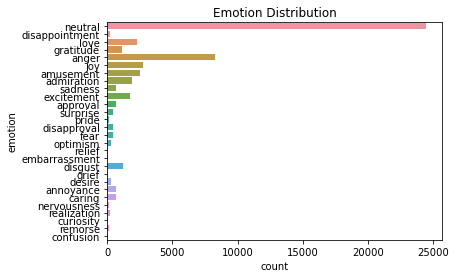

In [23]:
sns.countplot(data = large_text, y = 'emotion').set_title("Emotion Distribution")

In [25]:
large_text.head()

,Toxicity,tweet,tweet_clean,tweet_tokenized,tweet_tok=2,tweet_lemmatized,preprocessed_text,emotion
0,0,@user when a father is dysfunctional and is so...,father dysfunctional selfish drags kids dysfun...,"['father', 'dysfunctional', 'selfish', 'drags'...","[('father', 'dysfunctional'), ('dysfunctional'...","['father', 'dysfunctional', 'selfish', 'drag',...",father dysfunctional selfish drag kid dysfunct...,neutral
1,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit can not use cause do not ...,"['thanks', 'lyft', 'credit', 'can', 'not', 'us...","[('thanks', 'lyft'), ('lyft', 'credit'), ('cre...","['thank', 'lyft', 'credit', 'can', 'not', 'use...",thank lyft credit can not use cause do not off...,disappointment
2,0,bihday your majesty,bihday majesty,"['bihday', 'majesty']","[('bihday', 'majesty')]","['bihday', 'majesty']",bihday majesty,neutral
3,0,factsguide: society now #motivation,factsguide society motivation,"['factsguide', 'society', 'motivation']","[('factsguide', 'society'), ('society', 'motiv...","['factsguide', 'society', 'motivation']",factsguide society motivation,neutral
4,0,[2/2] huge fan fare and big talking before the...,huge fan fare big talking leave chaos pay disp...,"['huge', 'fan', 'fare', 'big', 'talking', 'lea...","[('huge', 'fan'), ('fan', 'fare'), ('fare', 'b...","['huge', 'fan', 'fare', 'big', 'talk', 'leave'...",huge fan fare big talk leave chaos pay dispute...,neutral


In [26]:
large_text.to_csv("AdvancedDataset.csv")